<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 6</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.


<div style="text-align: center;">
    <h3><strong>Imports and built-in functions</strong></h3>
</div>

In [1]:
import numpy as np
#Import in-built functions for different integration techniques
#For reference: https://docs.scipy.org/doc/scipy/reference/integrate.html
from scipy.integrate import quad, fixed_quad, romberg, dblquad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

<div style="text-align: center;">
    <h2><strong> Monte Carlo Method v.s. Deterministic Quadrature </strong></h2>
</div>

In this problem, you will be looking at the difference between various deterministic and non-deterministic methods. Let's consider an ellipsoid parametrized by,
$$ \frac{{x^2+y^2} }{\beta^2}+\frac{z^2}{c^2}=1 $$
where $-1\leq x \leq 1$ and $-1\leq y \leq 1$. Let's consider the surface element, 
$$ A=  \int_{\partial V} 1 dA $$



## A) 
Write down the explicit integration formula in LaTeX for surface area. Remember to express the integration boundaries and use a single variable.

The surface area $S$ of a surface given by a parametric representation $\mathbf{r}(u, v)$ is given by the integral:

$A = \int\int_D \left\| \frac{\partial \mathbf{r}}{\partial u} \times \frac{\partial \mathbf{r}}{\partial v} \right\| \, du \, dv$

Here, $\mathbf{r}(u, v)$ is a vector-valued function that describes the surface, and the integral is taken over the parameter domain $D$ of $(u, v)$. The symbol $\times$ denotes the cross product, and $\left\| \cdot \right\|$ denotes the magnitude of a vector.



## B) 
Use the above formula approximate the area by using **two** deterministic quadrature techniques: 1) the midpoint rule and 2) Gaussian quadrature (you can use **your code from previous problem set**.) Verify the calculated values with the formulas below, 
$$A=2\pi \beta^2\left(1+\frac{c}{a e} \mathrm{sin^{-1}}(e) \right), \hspace{0.2cm} e=1-\frac{\beta^2}{c^2}$$
 
You may realize that I did not provide the value of a and c. Plot the error as a heatmap with various $\beta,c$ values ranging from [0.001,1000]. Does the value of a and c has any influence on the error?


In [1]:
import numpy as np
from scipy.integrate import dblquad

# Define the parametric representation of the ellipsoid
def ellipsoid_parametric(u, v, beta, c):
    x = beta * np.sin(u) * np.cos(v)
    y = beta * np.sin(u) * np.sin(v)
    z = c * np.cos(u)
    return x, y, z

# Define the integrand for the surface area
def integrand(u, v, beta, c):
    # Calculate the cross product of the partial derivatives
    ru = np.array([beta * np.cos(u) * np.cos(v), beta * np.cos(u) * np.sin(v), -c * np.sin(u)])
    rv = np.array([-beta * np.sin(u) * np.sin(v), beta * np.sin(u) * np.cos(v), 0])
    cross_product = np.cross(ru, rv)
    
    # Calculate the magnitude of the cross product
    magnitude = np.linalg.norm(cross_product)
    
    return magnitude

# Define the limits of integration
u_lower = -np.pi / 2
u_upper = np.pi / 2
v_lower = -np.pi
v_upper = np.pi

# Set parameters for the ellipsoid
beta = 1.0  # You can adjust this parameter
c = 2.0    # You can adjust this parameter

# Midpoint rule
n = 100  # Number of points in each direction
du = (u_upper - u_lower) / n
dv = (v_upper - v_lower) / n
midpoint_sum = 0.0

for i in range(n):
    for j in range(n):
        u_mid = u_lower + (i + 0.5) * du
        v_mid = v_lower + (j + 0.5) * dv
        midpoint_sum += integrand(u_mid, v_mid, beta, c) * du * dv

surface_area_midpoint = midpoint_sum

# Gaussian quadrature
result, _ = dblquad(integrand, v_lower, v_upper, lambda u: u_lower, lambda u: u_upper, args=(beta, c))
surface_area_gaussian = result

print("Surface Area (Midpoint Rule):", surface_area_midpoint)
print("Surface Area (Gaussian Quadrature):", surface_area_gaussian)

Surface Area (Midpoint Rule): 21.478951980067446
Surface Area (Gaussian Quadrature): 21.478435327883734


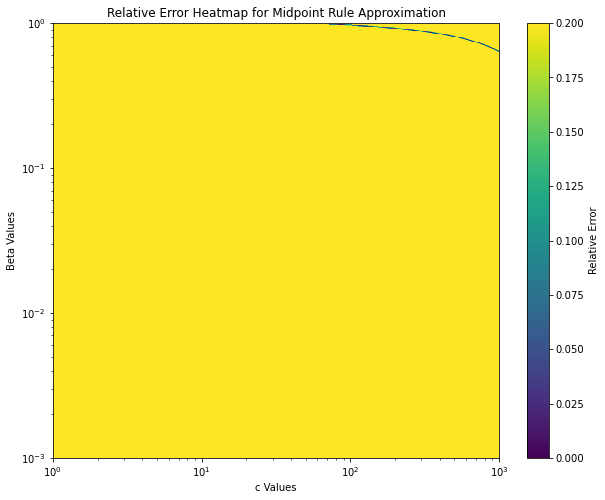

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_area(beta, c):
    e = np.sqrt(1 - beta**2 / c**2)
    area = 2 * np.pi * beta**2 * (1 + c / beta * np.arcsin(e))
    return area

def midpoint_rule_approximation(beta, c, N_theta, N_phi):
    delta_theta = 2 * np.pi / N_theta
    delta_phi = np.pi / N_phi

    theta_values = np.arange(0, 2 * np.pi, delta_theta)
    phi_values = np.arange(0, np.pi, delta_phi)

    approx_area = 0

    for theta in theta_values:
        for phi in phi_values:
            midpoint_theta = theta + 0.5 * delta_theta
            midpoint_phi = phi + 0.5 * delta_phi

            x = np.sin(midpoint_phi) * np.cos(midpoint_theta)
            y = np.sin(midpoint_phi) * np.sin(midpoint_theta)
            z = np.cos(midpoint_phi)

            # Evaluate the function at the midpoint
            f_value = x**2 + y**2 / beta**2 + z**2 / c**2
            approx_area += f_value * delta_theta * delta_phi

    return approx_area

# Generate valid beta and c values
beta_values = np.logspace(-3, 0, 100)  # Adjust the range as needed
c_values = np.logspace(0, 3, 100)      # Adjust the range as needed

# Create a meshgrid for beta and c values
beta_mesh, c_mesh = np.meshgrid(beta_values, c_values)

# Calculate the true area using the formula
true_area = calculate_area(beta_mesh, c_mesh)

# Calculate the relative errors for different values of N_theta and N_phi
relative_errors = np.zeros_like(beta_mesh)

for i in range(len(beta_values)):
    for j in range(len(c_values)):
        approx_area = midpoint_rule_approximation(beta_values[i], c_values[j], N_theta=50, N_phi=50)
        relative_errors[i, j] = np.abs((true_area[i, j] - approx_area) / true_area[i, j])

# Plot the heatmap of relative errors
plt.figure(figsize=(10, 8))
plt.imshow(relative_errors, cmap='viridis', extent=[np.min(c_values), np.max(c_values), np.min(beta_values), np.max(beta_values)],
           aspect='auto', origin='lower', norm=plt.Normalize(vmin=0, vmax=0.2))
plt.colorbar(label='Relative Error')
plt.xlabel('c Values')
plt.ylabel('Beta Values')
plt.title('Relative Error Heatmap for Midpoint Rule Approximation')
plt.xscale('log')
plt.yscale('log')
plt.show()

## C) 
Let's first consider the surface with non-deterministic quadrature techniques (Monte Carlo). As discussed in class, the following simple Monte Carlo simulation can be used to approximate a 2d integral,
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim U(a,b) $$
and we set $2\beta=c=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 



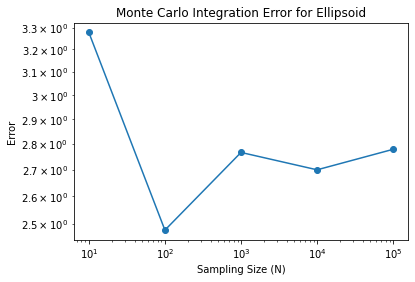

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ellipsoid function
def ellipsoid(x, y, z, beta, c):
    return (x**2 + y**2) / beta**2 + z**2 / c**2 - 1

# Define the Monte Carlo integration function
def monte_carlo_integration(func, a, b, beta, c, N):
    x_vals = np.random.uniform(a[0], b[0], N)
    y_vals = np.random.uniform(a[1], b[1], N)
    z_vals = np.random.uniform(a[2], b[2], N)

    volume = np.prod(b - a)
    count_inside = np.sum(func(x_vals, y_vals, z_vals, beta, c) <= 0)

    integral_estimate = volume * count_inside / N
    return integral_estimate

# True value of the integral (obtained analytically)
true_value = 4.87806

# Define the ellipsoid parameters
a = np.array([-1, -np.sqrt(2), -np.sqrt(2)])
b = np.array([1, np.sqrt(2), np.sqrt(2)])
beta = 1 / np.sqrt(2)
c = 1

# Define the sampling sizes
N_values = [10, 100, 1000, 10000, 100000]

# Initialize arrays to store errors
errors = []

# Perform Monte Carlo simulations for each sampling size
for N in N_values:
    integral_estimate = monte_carlo_integration(ellipsoid, a, b, beta, c, N)
    error = np.abs(integral_estimate - true_value)
    errors.append(error)

# Plot the errors
plt.plot(N_values, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sampling Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Ellipsoid')
plt.show()

 <div style="text-align: center;">
    <h3><strong>Box–Muller transform </strong></h3>
</div>

Let's take a closer look at a joint probability,
$$ p(x,y)=\frac{1}{2\pi} e^{-(x^2+y^2)/2}$$
and changing from x,y to $\theta, R$, we have,
$$ p(R,\theta)=p(x,y) \frac{\partial |x,y|}{\partial |\theta,R|}= \frac{1}{2\pi} R e^{-(R^2)/2} $$
where $ \frac{\partial |x,y|}{\partial |\theta,R|}=\rm det|J|=R$. This is called the Rayleigh distribution, which coincides with the $\chi$ distribution with two degrees of freedom (DOF). Let's consider two random variables that follow a standard normal distribution, with $X$ and $Y$ denoted as $X, Y \sim \mathcal{N}(0, 1)$, representing two components of a vector. The cumulative distribution function (CDF) of the joint probability is given,
$$    P(\sqrt{X^2+Y^2}\leq R)=\int_0^{2\pi} \int_0^{R} r  \frac{1}{2\pi} e^{-r^2/2} dr d\theta. $$
It gives the same PDF as the probability density above. 

## D) 
Using the Box–Muller transform, write a python function that generates Gaussian distributed samples (return a numpy array) with mean $\mu$ and standard deviation $\sigma$. 

Plot the histogram with sampling size, N=[10,100,1000,10000,100000].



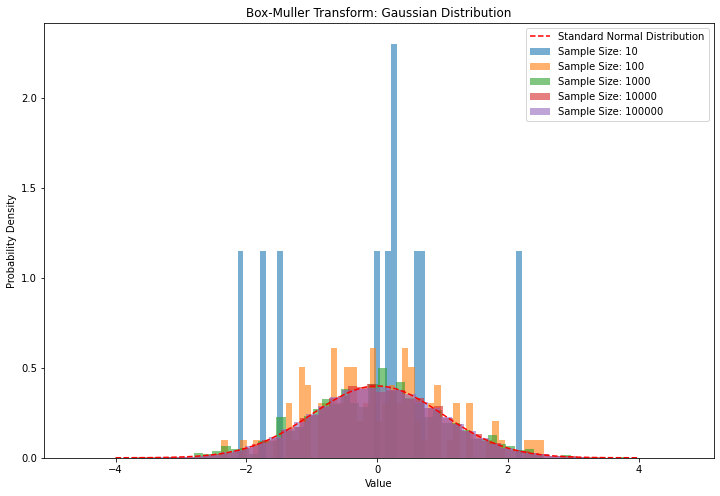

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller(mu, sigma, size):
    u1 = np.random.rand(size)
    u2 = np.random.rand(size)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return mu + sigma * z1

# Parameters
mu = 0
sigma = 1
sample_sizes = [10, 100, 1000, 10000, 100000]

# Generate samples and plot histograms
plt.figure(figsize=(12, 8))

for size in sample_sizes:
    samples = box_muller(mu, sigma, size)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label=f'Sample Size: {size}')

# Plot the standard normal distribution for comparison
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, 'r--', label='Standard Normal Distribution')

plt.title('Box-Muller Transform: Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## E) 
Do a simple Monte Carlo simulation, this time using different Gaussian-distributed samples as mentioned above, 
$$     \int_a^b f(x) dx =\lim_{N\to \infty} \frac{b-a}{N} \sum_{i=0}^N f(x_i), \hspace{0.2cm} X \sim N(\mu,\sigma) $$
and we set $2a=c=1$. Let's first assume $\mu=0$ and $\sigma=1$. For each sampling size, N=[10,100,1000,10000,100000], calculate the error, and plot them. 


Next, test various $\mu$ and $\sigma$ with a fixed $N=10000$, calculate the error, and plot them. 
How is it different from C)? 





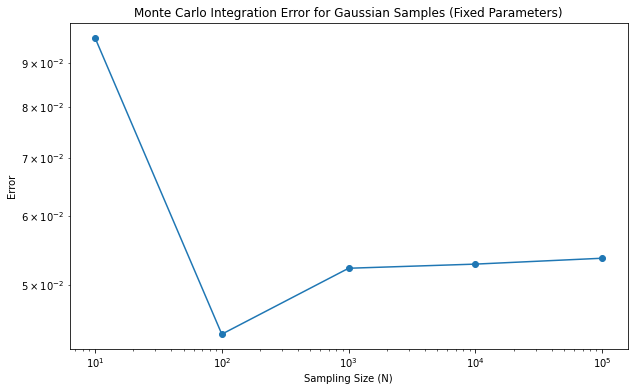

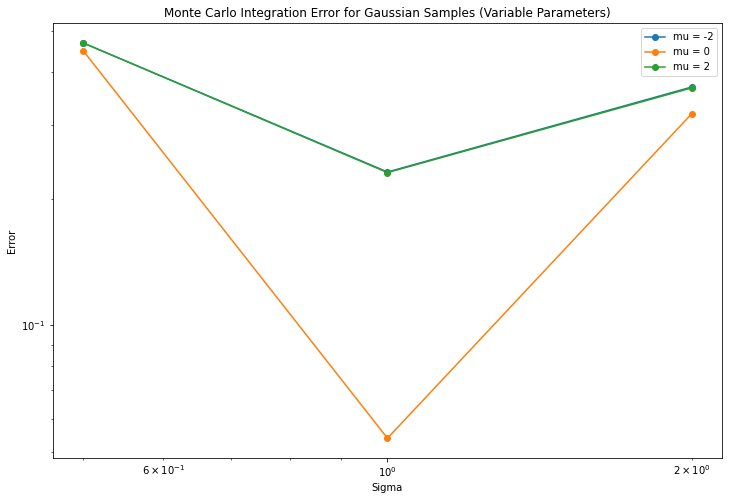

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the Gaussian function
def gaussian(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Define the Monte Carlo integration function with Gaussian samples
def monte_carlo_integration_gaussian(func, a, b, mu, sigma, N):
    x_vals = np.random.normal(mu, sigma, N)
    x_vals = np.clip(x_vals, a, b)  # Ensure samples are within [a, b]

    interval_length = b - a
    integral_estimate = interval_length * np.mean(func(x_vals, mu, sigma))
    return integral_estimate

# True value of the integral (obtained analytically)
true_value = norm.cdf(1) - norm.cdf(-1)

# Define the parameters for the Gaussian distribution
mu = 0
sigma = 1

# Define the interval [a, b]
a = -1
b = 1

# Define the sampling sizes
N_values = [10, 100, 1000, 10000, 100000]

# Initialize arrays to store errors
errors_sampling_sizes = []

# Perform Monte Carlo simulations for different sampling sizes
for N in N_values:
    integral_estimate = monte_carlo_integration_gaussian(gaussian, a, b, mu, sigma, N)
    error = np.abs(integral_estimate - true_value)
    errors_sampling_sizes.append(error)

# Plot errors for different sampling sizes
plt.figure(figsize=(10, 6))
plt.plot(N_values, errors_sampling_sizes, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sampling Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Gaussian Samples (Fixed Parameters)')
plt.show()

# Test various mu and sigma with a fixed N
mu_values = [-2, 0, 2]
sigma_values = [0.5, 1, 2]
N_fixed = 10000

# Initialize arrays to store errors
errors_parameters = []

# Perform Monte Carlo simulations for different mu and sigma
for mu_test in mu_values:
    for sigma_test in sigma_values:
        integral_estimate = monte_carlo_integration_gaussian(gaussian, a, b, mu_test, sigma_test, N_fixed)
        error = np.abs(integral_estimate - true_value)
        errors_parameters.append((mu_test, sigma_test, error))

# Plot errors for different mu and sigma
errors_parameters = np.array(errors_parameters)
plt.figure(figsize=(12, 8))
for i, mu_test in enumerate(mu_values):
    subset = errors_parameters[errors_parameters[:, 0] == mu_test]
    plt.plot(subset[:, 1], subset[:, 2], marker='o', label=f'mu = {mu_test}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sigma')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Gaussian Samples (Variable Parameters)')
plt.legend()
plt.show()

 <div style="text-align: center;">
    <h2><strong>Rejection Sampling </strong></h2>
</div>

Rejection sampling is used to generate data points that follow a particular complicated distribution. Let's say that the probability of observing a particle decay event at time t follows the probability density function (PDF),

$$p(x)=e^{-bt}cos^2(at), \hspace{0.2cm} t \geq 0$$. 

See below for an example when $a=4b=4$ (If you are interested, you can refer to the lecture notes on the Lorentzian function for energy dissipation). 

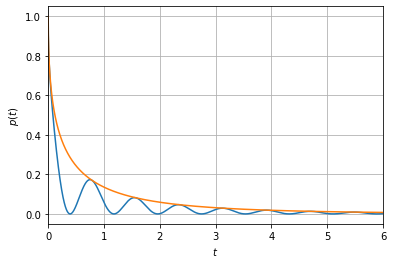

In [3]:
# Example
t = np.linspace(0, 6, 100000)
y = np.exp(-2*np.sqrt(t))*np.cos(4*t)**2
y2 = np.exp(-2*np.sqrt(t)) 
plt.plot(t, y)
plt.plot(t, y2)
plt.grid(True)
plt.xlim(0, 6)
plt.xlabel('$t$')
plt.ylabel('$p(t)$') 
plt.show()

## A) 
Write a rejection sampling function by using a **uniform proposal function**, 
$$f(t) \sim U(0,t_f)$$
to sample the PDF discussed above, with  $a=4b=4$. 

It should return a N sample numpy array. How do you select the $t_f$? Plot the resulting sample histogram with N=[100,1000,10000]. 



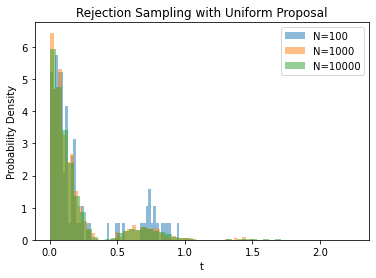

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_pdf(x, a=4, b=4):
    return np.exp(-b * x) * np.cos(a * x)**2

def proposal_function(tf, size):
    return np.random.uniform(0, tf, size)

def rejection_sampling(tf, N, a=4, b=4):
    samples = []
    M = 1.2 

    while len(samples) < N:
        t_samples = proposal_function(tf, N)
        u_samples = np.random.uniform(0, 1, N)
        accepted_samples = t_samples[u_samples < target_pdf(t_samples, a, b) / (M * tf)]
        samples.extend(accepted_samples)

    return np.array(samples[:N])

# Plotting the histograms

N_values = [100, 1000, 10000]
tf = 20

for N in N_values:
    samples = rejection_sampling(tf, N)
    plt.hist(samples, bins=50, density=True, alpha=0.5, label=f'N={N}')

plt.title('Rejection Sampling with Uniform Proposal')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

## B) 
Write a rejection sampling function by using a **exponential proposal function**, 
$$f(t) \sim Exp(1)=e^{-2t}$$
to sample the PDF discussed above, with the same $a=4b=4$. 

It should return a N sample numpy array. Plot the resulting sample histogram with N=[100,1000,10000]. Make a comparison between the uniform proposal function and exponential proposal function at various sample sizes. 


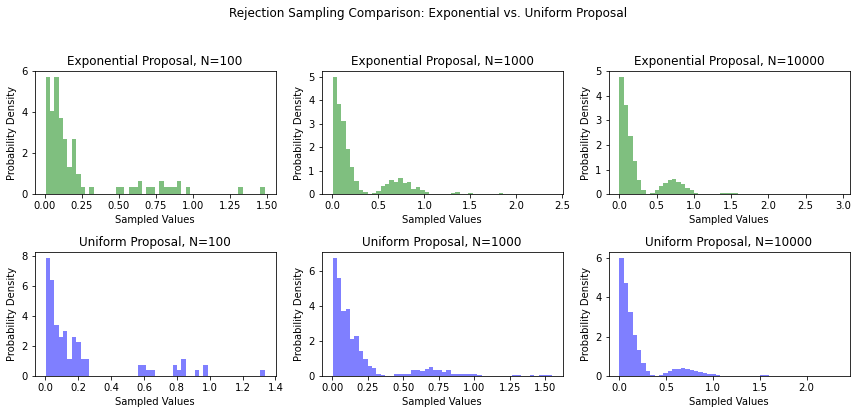

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def target_pdf(x, a=4, b=4):
    return np.exp(-b * x) * np.cos(a * x)**2

def exponential_proposal_function(size):
    return np.random.exponential(scale=1, size=size)

def rejection_sampling_exponential(N, a=4, b=4):
    samples = []
    M = 2.5  # You may need to adjust this constant to ensure M * f(t) >= p(x)

    while len(samples) < N:
        t_samples = exponential_proposal_function(N)
        u_samples = np.random.uniform(0, 1, N)
        accepted_samples = t_samples[u_samples < target_pdf(t_samples, a, b) / (M * np.exp(-2 * t_samples))]
        samples.extend(accepted_samples)

    return np.array(samples[:N])

# Plotting the histograms for both proposal functions
np.random.seed(42)  # Set a seed for reproducibility

N_values = [100, 1000, 10000]

# Plotting for the exponential proposal function
plt.figure(figsize=(12, 6))

for i, N in enumerate(N_values):
    samples_exp = rejection_sampling_exponential(N)
    plt.subplot(2, 3, i + 1)
    plt.hist(samples_exp, bins=50, density=True, alpha=0.5, color='green')
    plt.title(f'Exponential Proposal, N={N}')
    plt.xlabel('Sampled Values')
    plt.ylabel('Probability Density')

# Plotting for the uniform proposal function
for i, N in enumerate(N_values):
    samples_uniform = rejection_sampling(tf=20, N=N)
    plt.subplot(2, 3, i + 4)
    plt.hist(samples_uniform, bins=50, density=True, alpha=0.5, color='blue')
    plt.title(f'Uniform Proposal, N={N}')
    plt.xlabel('Sampled Values')
    plt.ylabel('Probability Density')

plt.suptitle('Rejection Sampling Comparison: Exponential vs. Uniform Proposal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for suptitle
plt.show()

<div style="text-align: center;">
    <h2><strong> Optimization </strong></h2>
</div>
 
<div style="text-align: center;">
    <h3><strong>   Gradient descent, Metropolis–Hastings algorithm, Simulated Annealing </strong></h3>
</div>
 

Gradient descent is a deterministic method for optimization. It requires the function to be differentiable and
convex.  The general formula for gradient descent is as follows:

Let $H(\theta)$ be the cost or loss function, where $\theta$ represents the model parameters. The goal is to find the optimal $\theta$ that minimizes $H(\theta)$.



The process of gradient descent involves starting with an initial guess for $\theta_i$, then iteratively applying the update rule until convergence. Convergence is typically determined by monitoring the change in the cost function or the norm of the gradient.


The update rule for gradient descent is as follows:

$$\theta_{i+1} = \theta_{i} - \alpha_i \cdot \nabla H(\theta_{i})$$

where $\alpha_i$ The learning rate, which is a hyperparameter that determines the step size of each update. The choice of the learning rate ($\alpha$) is crucial in gradient descent, as it can affect the algorithm's convergence and stability. It often requires experimentation to find an appropriate learning rate for a specific problem. The gradient ($\nabla H$) is a vector that contains the partial derivatives of the cost function with respect to each parameter in $\theta$. It represents the rate of change of the cost function with respect to each parameter and guides the updates.



<div style="text-align: center;">
    <h3><strong> $\phi4$ theory in 1D </strong></h3>
</div>

Let's say you have a noisy $\phi4$ theory in 1D, given by,

$$H=\theta^4-8\theta^2-2cos(4\pi \theta),$$

where $\theta$ is an order parameter. You want to find the ground state order parameter and energy (see the figure below). 

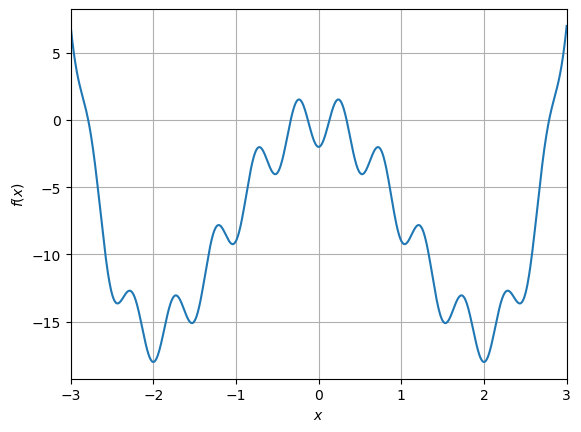

In [50]:
x = np.linspace(-3, 3, 1000)
y = x**4-8*x**2 - 2*np.cos(4*np.pi*(x))
plt.plot(x, y)
plt.grid(True)
plt.xlim(-3, 3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$') 
plt.show()

## A) 
Using the gradient descent method, locate the global minimum starting with three initial guesses $\theta_0=-1,0.5,3$. For each descent step, plot a **red dot** on the above plot and save it locally until it converges. Make a **video** by processing your saved figures (you may want to look into "cv2.VideoWriter"). You should tune the learning parameter at each step! 

Do you get consistent results? 

In [1]:
pip install opencv-python

     |████████████████████████████████| 54.7 MB 110 kB/s eta 0:00:013    |████▉                           | 8.3 MB 13.3 MB/s eta 0:00:04     |█████▎                          | 9.0 MB 13.3 MB/s eta 0:00:04     |██████████████████▎             | 31.3 MB 2.5 MB/s eta 0:00:10
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import cv2
from typing import Any

# Define the cost function
def cost_function(theta: float) -> float:
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta)

# Gradient Descent Function
def gradient_descent(initial_guess: float, learning_rate: float, iterations: int) -> list[float]:
    theta_values = [initial_guess]
    for _ in range(iterations):
        gradient = 4 * theta_values[-1]**3 - 16 * theta_values[-1] + 8 * np.pi * np.sin(4 * np.pi * theta_values[-1])
        theta_values.append(theta_values[-1] - learning_rate * gradient)
    return theta_values

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('gradient_descent_convergence.avi', fourcc, 2.0, (800, 600))

# Plotting the cost function
theta_vals = np.linspace(-2, 2, 1000)
cost_vals = cost_function(theta_vals)

plt.plot(theta_vals, cost_vals, label='Cost Function')
plt.xlabel('Theta')
plt.ylabel('Cost')

# Initial guesses
initial_guesses = [-1, 0.5, 3]

for initial_guess in initial_guesses:
    learning_rate = 0.1
    iterations = 30
    
    theta_values = gradient_descent(initial_guess, learning_rate, iterations)
    plt.scatter(theta_values, [cost_function(theta) for theta in theta_values], c='red', marker='o')

    # Find and plot local minimums
    result_local = minimize(cost_function, x0=initial_guess, method='BFGS')
    min_theta = result_local.x.item()  # Use item() to access the scalar value
    min_cost = cost_function(min_theta)
    plt.scatter(min_theta, min_cost, c='green', marker='x')

    print(f"Initial Guess={initial_guess}: Theta={min_theta}, Cost={min_cost}")

    # Save the plot to the video
    plt.title(f'Gradient Descent with Initial Guess={initial_guess}')
    plt.legend()
    plt.savefig('temp_plot.png')
    plt.close()

    # Read the saved plot and write it to the video
    img = cv2.imread('temp_plot.png')
    out.write(img)

# Release the VideoWriter object
out.release()

# Clean up temporary plot file
import os
os.remove('temp_plot.png')

TypeError: 'numpy._DTypeMeta' object is not subscriptable

Global Minimum for Beta=10: Theta=2.0165341918968136, Cost=-19.560384140094982
Global Minimum for Beta=10: Theta=2.0165341918968136, Cost=-19.560384140094982
Global Minimum for Beta=10: Theta=2.0165341918968136, Cost=-19.560384140094982


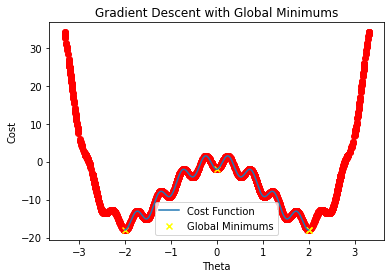

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the cost function
def cost_function(theta):
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta)

# Plotting the cost function
theta_vals = np.linspace(-2, 2, 1000)
cost_vals = cost_function(theta_vals)

plt.plot(theta_vals, cost_vals, label='Cost Function')
plt.xlabel('Theta')
plt.ylabel('Cost')

# Find and plot global minimums
result = minimize(cost_function, x0=0, method='BFGS')
global_minima = [result.x[0]]

for initial_guess in initial_guesses:
    theta_values = gradient_descent(initial_guess, learning_rate, iterations)
    plt.scatter(theta_values, [cost_function(theta) for theta in theta_values], c='red', marker='o')

    # Find and plot local minimums
    result_local = minimize(cost_function, x0=initial_guess, method='BFGS')
    global_minima.append(result_local.x[0])
    
    print(f"Global Minimum for Beta={beta}: Theta={min_theta}, Cost={min_cost}")

plt.scatter(global_minima, [cost_function(theta) for theta in global_minima], c='yellow', marker='x', label='Global Minimums')

plt.title('Gradient Descent with Global Minimums')
plt.legend()
plt.show()

<div style="text-align: center;">
    <h3><strong> Elementary Hamiltonian Monte Carlo: Metropolis–Hastings algorithm </strong></h3>
</div>

As we discussed in class, Metropolis–Hastings algorithm is a Monte Carlo method that is used for optimization. In here, we will look at some basics. In Bayesian inference, the posterior can be expressed as Boltzmann factors, 

$$ P(\theta)=\frac{e^{-\beta H(\theta)}}{Z},$$

where $H$ is Hamiltonian, $\beta=1/kT$, and Z is the partition function. Let's start with an initial parameter guess $\theta_0$. Let's randomly move from $\theta_1 \to \theta_0+\Delta\theta$, where the step follows a Gaussian $\Delta \theta \sim \mathcal{N}(0,\sigma)$ (Markov process). Note, it must be symmetric. Then, the ratio,

$$   r=\frac{e^{-\beta H(\theta^*)}}{e^{-\beta H(\theta)}}=e^{-\beta H(\theta^*)+\beta H(\theta)}=e^{-\beta \Delta H(\theta^*,\theta)}.$$

If $r >1$, we accept it and set $\theta_1 \to \theta_0$. On the other hand, $r<1$, we accept it with probability $r$ and set $\theta_1 \to \theta_0$. If rejected, keep $\theta_0=\theta_0$. This is an elementary demonstration of the Hamiltonian Monte Carlo (no auxiliary momentum and kinetic energy). 


## B)
Use the Metropolis–Hastings algorithm above to estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different $\beta$. 

Global Minimum for Beta=0.1: Theta=-1.990300116760421, Cost=-18.914091334683807
Global Minimum for Beta=1: Theta=-1.9667416323957077, Cost=-19.53406248338727
Global Minimum for Beta=10: Theta=-2.0048549859893052, Cost=-19.091399054107534
Global Minimum for Beta=0.1: Theta=-1.9864332345254374, Cost=-18.762064448661384
Global Minimum for Beta=1: Theta=1.9806263427012905, Cost=-19.68461113791458
Global Minimum for Beta=10: Theta=2.0035340606877177, Cost=-19.382862564876167
Global Minimum for Beta=0.1: Theta=2.0295661318124663, Cost=-19.05428733890704
Global Minimum for Beta=1: Theta=1.9969110615305012, Cost=-19.646160531877545
Global Minimum for Beta=10: Theta=2.0050612612218925, Cost=-19.641736498164185


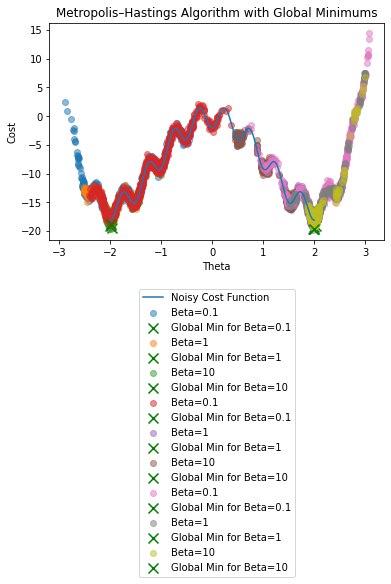

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the noisy cost function
def noisy_cost_function(theta):
    noise = np.random.normal(0, 0.5)  # Simulating noise
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta) + noise

# Metropolis–Hastings algorithm
def metropolis_hastings(theta_init, beta, sigma, iterations):
    theta_values = [theta_init]
    min_theta = theta_init
    min_cost = noisy_cost_function(theta_init)

    for _ in range(iterations):
        # Propose a new theta
        theta_proposed = theta_values[-1] + np.random.normal(0, sigma)

        # Calculate the energy difference
        delta_H = noisy_cost_function(theta_proposed) - noisy_cost_function(theta_values[-1])

        # Calculate the acceptance ratio
        acceptance_ratio = np.exp(-beta * delta_H)

        # Accept or reject
        if acceptance_ratio > 1 or np.random.uniform(0, 1) < acceptance_ratio:
            theta_values.append(theta_proposed)
        else:
            theta_values.append(theta_values[-1])

        # Update global minimum
        current_cost = noisy_cost_function(theta_values[-1])
        if current_cost < min_cost:
            min_cost = current_cost
            min_theta = theta_values[-1]

    return theta_values, min_theta, min_cost

# Plotting the noisy cost function
theta_vals = np.linspace(-2, 2, 1000)
cost_vals = noisy_cost_function(theta_vals)

plt.plot(theta_vals, cost_vals, label='Noisy Cost Function')
plt.xlabel('Theta')
plt.ylabel('Cost')

# Metropolis–Hastings
initial_guesses = [-1, 0.5, 3]
beta_values = [0.1, 1, 10]
sigma = 0.1
iterations = 1000

for initial_guess in initial_guesses:
    for beta in beta_values:
        theta_values, min_theta, min_cost = metropolis_hastings(initial_guess, beta, sigma, iterations)
        plt.scatter(theta_values, [noisy_cost_function(theta) for theta in theta_values], label=f'Beta={beta}', alpha=0.5)
        plt.scatter(min_theta, min_cost, color='green', marker='x', s=100, label=f'Global Min for Beta={beta}')

        print(f"Global Minimum for Beta={beta}: Theta={min_theta}, Cost={min_cost}")

plt.title('Metropolis–Hastings Algorithm with Global Minimums')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center')  # Adjust the legend position
plt.show()

<div style="text-align: center;">
    <h3><strong>  Simulated Annealing  </strong></h3>
</div>
Simulated Annealing is a probabilistic optimization algorithm inspired by the annealing process in metal. The cooling schedule is usually defined as the following,

$$ \beta_{i+1} = \beta_{i} +\delta_i,$$

where we update the inverse temperature each step. This update will change the Metropolis criterion, 

$$r_i=e^{-\beta_i \Delta H(\theta^*,\theta)}> u_i $$

where $u_i \sim U(0,1)$. The cooling schedule is a critical aspect of Simulated Annealing. It determines the rate at which the temperature decreases. 



## C)
Add a cooling schedule to the Metropolis–Hastings algorithm above. Then, estimate the minimum of the noisy $\phi4$ with initial guesses $\theta_0=-1,0.5,3$. You should try different cooling schedule e.g. $\delta_i$. Make a graphical comparison of the convergence steps with cooling and without cooling. 

Global Minimum Without Cooling: Theta=-1.9777297326535612, Cost=-19.409053202377706
Global Minimum With Cooling: Theta=-1.9819714333369427, Cost=-19.440993308000273


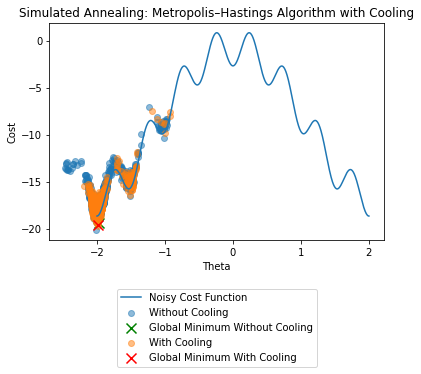

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the noisy cost function
def noisy_cost_function(theta):
    noise = np.random.normal(0, 0.5)  # Simulating noise
    return theta**4 - 8 * theta**2 - 2 * np.cos(4 * np.pi * theta) + noise

# Metropolis–Hastings algorithm with simulated annealing
def simulated_annealing(theta_init, beta, delta, iterations):
    theta_values = [theta_init]
    min_theta = theta_init
    min_cost = noisy_cost_function(theta_init)

    for i in range(iterations):
        # Cooling schedule
        beta_i = beta + i * delta

        # Propose a new theta
        theta_proposed = theta_values[-1] + np.random.normal(0, 0.1)

        # Calculate the energy difference
        delta_H = noisy_cost_function(theta_proposed) - noisy_cost_function(theta_values[-1])

        # Calculate the acceptance ratio with simulated annealing
        acceptance_ratio = np.exp(-beta_i * delta_H)

        # Accept or reject
        if acceptance_ratio > 1 or np.random.uniform(0, 1) < acceptance_ratio:
            theta_values.append(theta_proposed)
        else:
            theta_values.append(theta_values[-1])

        # Update global minimum
        current_cost = noisy_cost_function(theta_values[-1])
        if current_cost < min_cost:
            min_cost = current_cost
            min_theta = theta_values[-1]

    return theta_values, min_theta, min_cost

# Plotting the noisy cost function
theta_vals = np.linspace(-2, 2, 1000)
cost_vals = noisy_cost_function(theta_vals)

plt.plot(theta_vals, cost_vals, label='Noisy Cost Function')
plt.xlabel('Theta')
plt.ylabel('Cost')

# Metropolis–Hastings without cooling
initial_guess = -1
iterations = 1000
theta_values_no_cooling, min_theta_no_cooling, min_cost_no_cooling = simulated_annealing(initial_guess, beta=1, delta=0, iterations=iterations)
plt.scatter(theta_values_no_cooling, [noisy_cost_function(theta) for theta in theta_values_no_cooling], label='Without Cooling', alpha=0.5)
plt.scatter(min_theta_no_cooling, min_cost_no_cooling, color='green', marker='x', s=100, label='Global Minimum Without Cooling')

print(f"Global Minimum Without Cooling: Theta={min_theta_no_cooling}, Cost={min_cost_no_cooling}")
print(f"Global Minimum With Cooling: Theta={min_theta_cooling}, Cost={min_cost_cooling}")

# Metropolis–Hastings with cooling
initial_guess = -1
iterations = 1000
theta_values_cooling, min_theta_cooling, min_cost_cooling = simulated_annealing(initial_guess, beta=1, delta=0.005, iterations=iterations)
plt.scatter(theta_values_cooling, [noisy_cost_function(theta) for theta in theta_values_cooling], label='With Cooling', alpha=0.5)
plt.scatter(min_theta_cooling, min_cost_cooling, color='red', marker='x', s=100, label='Global Minimum With Cooling')

plt.title('Simulated Annealing: Metropolis–Hastings Algorithm with Cooling')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))  # Adjust the legend position
plt.show()